In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/인기 수행평가/Factors_ affecting_ university_student_grades_dataset.csv')

Mounted at /content/drive


In [2]:
# 결측치 확인
df.isnull().sum()

,0
Age,965
Gender,979
Parental_Education,962
Family_Income,967
Previous_Grades,944
Attendance,1004
Class_Participation,966
Study_Hours,991
Major,928
School_Type,949


In [3]:
# 필요없는 속성 제거
df.drop('Age', axis=1, inplace=True)
df.drop('Gender', axis=1, inplace=True)
df.drop('Family_Income', axis=1, inplace=True)
df.drop('Previous_Grades', axis=1, inplace=True)
df.drop('Attendance', axis=1, inplace=True)
df.drop('Class_Participation', axis=1, inplace=True)
df.drop('Study_Hours', axis=1, inplace=True)
df.drop('Major', axis=1, inplace=True)
df.drop('School_Type', axis=1, inplace=True)
df.drop('Financial_Status', axis=1, inplace=True)
df.drop('Parental_Involvement', axis=1, inplace=True)
df.drop('Educational_Resources', axis=1, inplace=True)
df.drop('Motivation', axis=1, inplace=True)
df.drop('School_Environment', axis=1, inplace=True)
df.drop('Professor_Quality', axis=1, inplace=True)
df.drop('Class_Size', axis=1, inplace=True)
df.drop('Extracurricular_Activities', axis=1, inplace=True)
df.drop('Sleep_Patterns', axis=1, inplace=True)
df.drop('Nutrition', axis=1, inplace=True)
df.drop('Physical_Activity', axis=1, inplace=True)
df.drop('Screen_Time', axis=1, inplace=True)
df.drop('Educational_Tech_Use', axis=1, inplace=True)
df.drop('Peer_Group', axis=1, inplace=True)
df.drop('Bullying', axis=1, inplace=True)
df.drop('Study_Space', axis=1, inplace=True)
df.drop('Learning_Style', axis=1, inplace=True)
df.drop('Tutoring', axis=1, inplace=True)
df.drop('Mentoring', axis=1, inplace=True)
df.drop('Lack_of_Interest', axis=1, inplace=True)
df.drop('Time_Wasted_on_Social_Media', axis=1, inplace=True)
df.drop('Sports_Participation', axis=1, inplace=True)
df.drop('Parental_Education', axis=1, inplace=True)
df.drop('Grades', axis=1, inplace=True)

In [4]:
# 결측치 제거
df.dropna(subset=['Self_Esteem'],axis=0, inplace=True)
df.dropna(subset=['Stress_Levels'],axis=0, inplace=True)

In [5]:
# 결측치 확인
df.isnull().sum()

,0
Self_Esteem,0
Stress_Levels,0


In [6]:
# 속성별 개수 출력
print(df["Self_Esteem"].value_counts())
print(df["Stress_Levels"].value_counts())

Self_Esteem
Low       2843
High      2746
Medium    2722
Name: count, dtype: int64
Stress_Levels
Low       2808
Medium    2774
High      2729
Name: count, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 라벨링 (Low, Medium, High -> 0, 1, 2로 변환)
label_encoder = LabelEncoder()

df['Self_Esteem'] = label_encoder.fit_transform(df['Self_Esteem'])
df['Stress_Levels'] = label_encoder.fit_transform(df['Stress_Levels'])

df

,Self_Esteem,Stress_Levels
0,1,0
2,1,0
3,2,2
5,0,1
6,0,0
...,...,...
10058,0,2
10059,2,0
10061,1,1
10062,1,0


In [8]:
# 독립 변수(X)와 종속 변수(y) 설정
X_data = df[['Self_Esteem']]
X_data.shape


(8311, 1)

In [9]:
y_data = df['Stress_Levels']
y_data.shape

(8311,)

In [10]:
# 데이터 분할 (훈련 데이터: 80%, 테스트 데이터: 20%)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

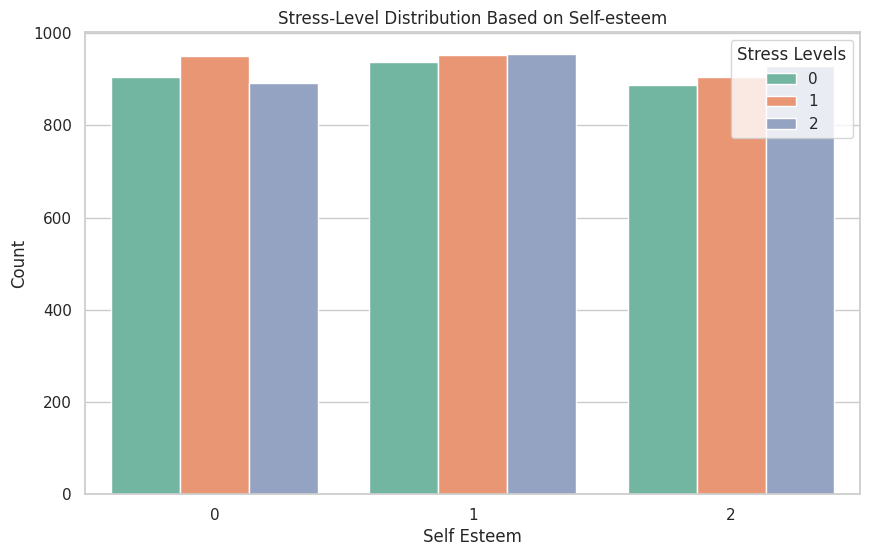

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 자존감과 스트레스 수준의 분포를 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Self_Esteem', hue='Stress_Levels', palette='Set2')
plt.title('Stress-Level Distribution Based on Self-esteem')
plt.xlabel('Self Esteem')
plt.ylabel('Count')
plt.legend(title='Stress Levels', loc='upper right')
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 랜덤 포레스트 학습
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
from sklearn.metrics import classification_report, accuracy_score

# 랜덤 포레스트 예측
y_pred_rf = rf.predict(X_test)

# 랜덤 포레스트 성능 평가
print("랜덤 포레스트 결과")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

랜덤 포레스트 결과
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       556
           1       0.31      0.61      0.42       553
           2       0.30      0.32      0.31       554

    accuracy                           0.31      1663
   macro avg       0.21      0.31      0.24      1663
weighted avg       0.21      0.31      0.24      1663

Random Forest Accuracy: 0.3108839446782922


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# 로지스틱 회귀 학습
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
from sklearn.metrics import classification_report, accuracy_score

# 로지스틱 회귀 예측
y_pred_log_reg = log_reg.predict(X_test)

# 로지스틱 회귀 성능 평가
print("로지스틱 회귀 결과")
print(classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

로지스틱 회귀 결과
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       556
           1       0.35      0.71      0.47       553
           2       0.37      0.36      0.36       554

    accuracy                           0.35      1663
   macro avg       0.24      0.36      0.28      1663
weighted avg       0.24      0.35      0.28      1663

Logistic Regression Accuracy: 0.3547805171377029


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
